In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('player_shooting_2023_2024.csv')

In [3]:
df.head()

,Unnamed: 0,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,Birth Month
0,0,1,Max Aarons,ENG,DF,Bournemouth,24.0,2000.0,12.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,Matches,May
1,1,2,Bénie Adama Traore,CIV,"FW,MF",Sheffield Utd,21.0,2002.0,4.3,0.0,...,0.0,0.0,0.0,0.3,0.3,0.27,-0.3,-0.3,Matches,April
2,2,3,Tyler Adams,USA,MF,Bournemouth,25.0,1999.0,1.2,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Matches,July
3,3,4,Tosin Adarabioyo,ENG,DF,Fulham,26.0,1997.0,16.0,2.0,...,0.0,0.0,0.0,0.7,0.7,0.05,1.3,1.3,Matches,February
4,4,5,Elijah Adebayo,ENG,FW,Luton Town,26.0,1998.0,12.9,9.0,...,0.0,0.0,0.0,5.6,5.6,0.20,3.4,3.4,Matches,June


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   584 non-null    int64  
 1   Rk           584 non-null    object 
 2   Player       584 non-null    object 
 3   Nation       584 non-null    object 
 4   Pos          584 non-null    object 
 5   Squad        584 non-null    object 
 6   Age          562 non-null    float64
 7   Born         562 non-null    float64
 8   90s          562 non-null    float64
 9   Gls          562 non-null    float64
 10  Sh           562 non-null    float64
 11  SoT          562 non-null    float64
 12  SoT%         457 non-null    float64
 13  Sh/90        562 non-null    float64
 14  SoT/90       562 non-null    float64
 15  G/Sh         457 non-null    float64
 16  G/SoT        395 non-null    float64
 17  Dist         457 non-null    float64
 18  FK           562 non-null    float64
 19  PK      

In [5]:
df.describe()

,Unnamed: 0,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
count,584.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,457.000000,562.000000,562.000000,...,395.000000,457.000000,562.000000,562.000000,562.000000,562.000000,562.000000,457.000000,562.000000,562.000000
mean,291.500000,25.770463,1997.519573,12.224555,1.734875,15.044484,5.088968,31.132166,1.399875,0.432242,...,0.294810,16.587309,0.412811,0.142349,0.158363,1.748577,1.622954,0.101510,-0.013701,-0.030427
std,168.730554,4.360614,4.364883,9.444622,2.969691,18.596374,7.175611,20.309767,2.056370,0.617645,...,0.274362,4.858932,1.465119,0.660325,0.715135,2.766119,2.448454,0.073324,1.089624,1.068367
min,0.000000,17.000000,1984.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,-5.900000,-6.100000
25%,145.750000,22.000000,1994.000000,3.500000,0.000000,2.000000,0.000000,20.000000,0.322500,0.000000,...,0.000000,12.700000,0.000000,0.000000,0.000000,0.100000,0.100000,0.050000,-0.400000,-0.400000
50%,291.500000,26.000000,1998.000000,11.300000,0.000000,8.000000,2.000000,30.800000,0.925000,0.230000,...,0.280000,16.400000,0.000000,0.000000,0.000000,0.700000,0.700000,0.090000,0.000000,-0.100000
75%,437.250000,29.000000,2001.000000,19.800000,2.000000,22.000000,7.000000,41.200000,2.007500,0.667500,...,0.430000,19.900000,0.000000,0.000000,0.000000,2.100000,2.100000,0.130000,0.200000,0.200000
max,583.000000,39.000000,2007.000000,32.000000,19.000000,99.000000,42.000000,100.000000,30.000000,7.500000,...,1.000000,32.900000,13.000000,8.000000,8.000000,21.800000,18.700000,0.960000,5.700000,5.500000


In [6]:
# Tiền xử lý dữ liệu (xử lý giá trị thiếu, mã hóa biến phân loại)
df = df.dropna()  # Ví dụ đơn giản, loại bỏ các hàng có giá trị thiếu
df = pd.get_dummies(df, columns=['Nation', 'Pos', 'Squad'], drop_first=True)

In [7]:
# Chọn biến đầu vào (features) và biến mục tiêu (target)
X = df[['Age', '90s', 'Sh', 'SoT', 'Sh/90', 'SoT/90', 'xG', 'npxG', 'Dist', 'FK', 'PK', 'PKatt']]
y = df['Gls']

In [8]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Xây dựng và huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

In [11]:
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.743734485125144


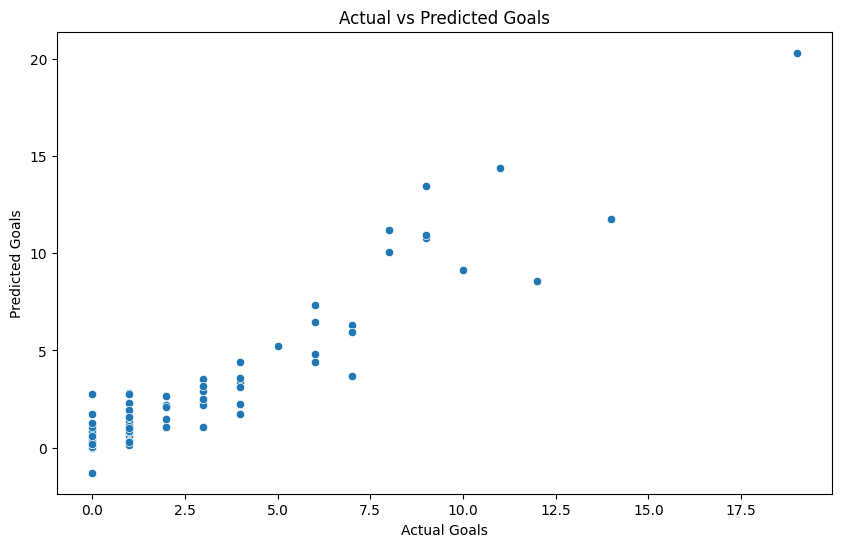

In [12]:
# Trực quan hóa kết quả dự đoán so với giá trị thực tế
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Goals')
plt.ylabel('Predicted Goals')
plt.title('Actual vs Predicted Goals')
plt.show()

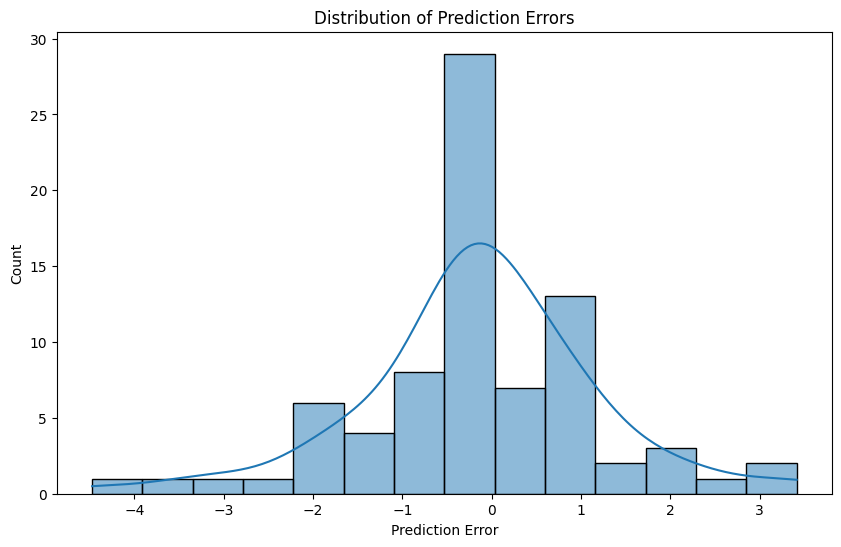

In [13]:
# Trực quan hóa phân phối của sai số dự đoán
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.title('Distribution of Prediction Errors')
plt.show()